## Question 1.  Social Media and Study Results

We  want  to  investigate  whether  there  is  a  link  between  the  use  of  social  media  and  the  performance  of
students.  We  ask  1064  students  how  many  hours  they  spend  on  average  per  day  using  social  media.    By
social media we  mean Facebook, YouTube, blogs, Twitter,  MySpace and LinkedIn.  We also check the final
score  of  these  students  at  the  end  of  the  year.  The  result  of  this  survey  can  be  found  in  the  file
"socialMediaVsPoints.csv".

a. Load the file.  Ensure that the number of hours is read as numbers.  Remove the rows with an
unknown value.  Now remove the rows with outliers. How many rows are left?
b. Make a histogram of the hours and the points separately.
c. What is the average number of hours a student spends on social media?
d. What is the standard deviation of the number of hours?  What does this mean?
e. What is the average score of the students?
f. What is the standard deviation of the score?
g. Make a scatterplot of the 2 variables.  What correlation do you expect?
h. Calculate the correlation between the 2 variables.  Do this also via the Z-scores (Pearson).  What did
you decide?
i. Which rank correlation coefficient do you find according to Kendall?  What does this value mean?
j. Does it make sense to determine a regression line here?  Why yes/no?  Determine the regression
line if it makes sense.

In [23]:
import pandas as pd
sm = pd.read_csv('socialMediaVsPoints.csv',delimiter=',',decimal='.',na_values=0)
sm=sm.dropna()
sm['hours']=pd.to_numeric(sm['hours'])
sm

,hours,points
0,0.70,15.0
1,0.68,18.0
2,1.50,14.0
3,2.40,6.0
5,1.95,18.0
...,...,...
1059,2.64,15.0
1060,1.58,11.0
1061,1.53,18.0
1062,0.80,16.0


In [24]:
import numpy as np
def remove_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    I = Q3 - Q1
    low = Q1 - 1.5 * I
    high = Q3 + 1.5 * I
    return data[data.between(low,high)]
sm['hours'],sm['points']=remove_outliers(sm['hours']),remove_outliers(sm['points'])

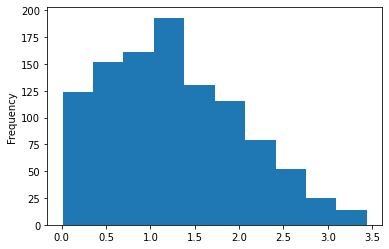

In [25]:
import matplotlib.pyplot as plt
plt.figure()
sm['hours'].plot.hist()
plt.show()

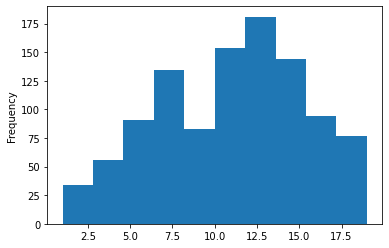

In [26]:
plt.figure()
sm['points'].plot.hist()
plt.show()

In [27]:
sm['hours'].mean()

1.2650239234449754

In [28]:
sm['hours'].std()

0.7532422412134056

In [29]:
sm['points'].mean()

10.935114503816793

In [30]:
sm['points'].std()

4.38887929840294

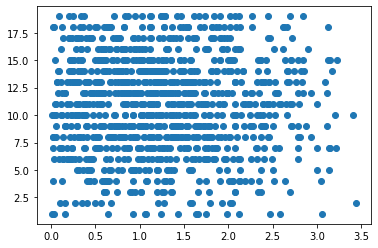

In [31]:
plt.figure()
plt.scatter(sm['hours'],sm['points'])
plt.show()

In [32]:
sm.corr(method='pearson')

,hours,points
hours,1.000000,-0.008443
points,-0.008443,1.000000


In [33]:
sm['hours'].corr(sm['points'])

-0.008442786060627205

In [34]:
sm.corr(method='kendall')

,hours,points
hours,1.000000,-0.004416
points,-0.004416,1.000000


no correlation
## QUESTION 2
Batteries for smartphones are manufactured in a factory.  The demand for these batteries varies considerably.
One suspects that if demand (and therefore production) increases, the percentage of exploding batteries also
increases (and thus: the quality drops due to the working pressure).  One wants to verify this.

A  measurement  is  made.    Every  day  the  number  of  batteries  produced  is  tracked.    If  a  defective  battery  is
returned  (or  one  explodes),  it  is  verified  on  which  day  it  was  produced.    The  data  can  be  found  in  the  file
"batteries.csv". The first column shows how many batteries were produced and the second column shows how
many batteries were defective.

a. Load the file.  There are lines with more than 2 values.  See what Python does with them when you
load the values.  Remove this line from the data.  There are outliers in the column Defect and
remove these.  How many rows do you have left now?
b. Make a scatterplot of the two variables.  Is there a linear correlation?
c. What correlation do you find with Kendall's method?
d. We are actually not interested in the absolute number of defective batteries, but we are interested in
the percentage.  So divide the number of defective batteries by the number of batteries produced.
What is the average percentage of defective batteries?
e. Make a scatterplot with the percentage of defective batteries.  Can you see the difference with the
previous graph?
f. Now calculate the correlation between the number of batteries produced and the percentage of
defective batteries.  What do you decide?
g. What is the value of R²?  What does it mean?
h. Draw the regression line on the scatterplot.  What are the values for the slope and intercept?
i. What is the standard estimated error?  What does this mean?
j. If production would be increased to 8000 batteries/day, how many defective batteries would you
expect then?
k. How many batteries can the factory produce per day so that there is no more than 1 percent defect?

In [35]:
import numpy as np
bt = pd.read_csv('batteries.csv',delimiter=',',na_values=np.nan)
bt

,#Produced,#Defects
0,1489,21
1,2162,34
2,2472,47
3,3116,77
4,4724,227
...,...,...
91,1959,23
92,1464,9
93,2368,23
94,2873,36


In [36]:
bt['#Defects']=remove_outliers(bt['#Defects'])
bt['#Defects']=pd.to_numeric(bt['#Defects'])
bt=bt.dropna()
bt

,#Produced,#Defects
0,1489,21.0
1,2162,34.0
2,2472,47.0
3,3116,77.0
5,1367,12.0
...,...,...
91,1959,23.0
92,1464,9.0
93,2368,23.0
94,2873,36.0


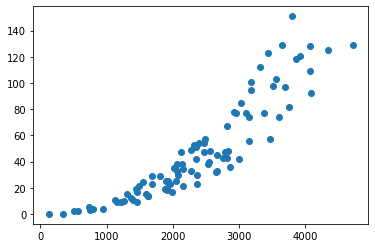

In [38]:
plt.figure()
plt.scatter(bt['#Produced'],bt['#Defects'])
plt.show()

In [39]:
bt.corr(method='kendall')

,#Produced,#Defects
#Produced,1.000000,0.814006
#Defects,0.814006,1.000000


In [40]:
bt['#Produced'].sum()/bt['#Defects'].sum()

49.86936834955852

In [ ]:
btp=bt
btp['percentage']=btp['#Produced']/btp['#Defects']
plt.figure()
plt.scatter(btp['#Produced'],btp['percentage'])
plt.show()